<a href="https://colab.research.google.com/drive/1TllRTgcPbXNEn39pcpBmUroVSiwaI2LI#scrollTo=KeuFct5irbCw" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## 1. Load dataset & import library

In [1]:
!gdown --folder https://drive.google.com/drive/folders/1FDfaBhqWEWhNKH0BX1S00_SU0CIZuvNj?usp=drive_link

Retrieving folder contents
Processing file 1CypV5NYf-l7CH6eovK-1rjOGNbqh8jEL X_test.csv
Processing file 1naM47Yz7se4z2161vHOGlsRPw0gZeLKd X_train.csv
Processing file 1GLNbaP-P-pDncjrz2UXT9IpH9k40Ht5G y_test.csv
Processing file 1DY3xGU4rcojDZGgNumddKqfLwgnBWJ1s y_train.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1CypV5NYf-l7CH6eovK-1rjOGNbqh8jEL
To: /content/dataset_ML/X_test.csv
100% 34.0M/34.0M [00:00<00:00, 66.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1naM47Yz7se4z2161vHOGlsRPw0gZeLKd
From (redirected): https://drive.google.com/uc?id=1naM47Yz7se4z2161vHOGlsRPw0gZeLKd&confirm=t&uuid=9a7a53ed-86a5-4b10-a702-312b85c5f441
To: /content/dataset_ML/X_train.csv
100% 136M/136M [00:03<00:00, 38.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GLNbaP-P-pDncjrz2UXT9IpH9k40Ht5G
To: /content/dataset_ML/y_test.csv
100% 4.00k/4.00k [00:00<00:00, 

In [2]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

## 2. Load train/test data from CSV file

In [3]:
X_train = pd.read_csv('./dataset_ML/X_train.csv', header=None).values
y_train = pd.read_csv('./dataset_ML/y_train.csv', header=None).values
X_test = pd.read_csv('./dataset_ML/X_test.csv', header=None).values
y_test = pd.read_csv('./dataset_ML/y_test.csv', header=None).values
print(f'X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}')

X_train.shape: (3200, 3136), X_test.shape: (800, 3136)


## 3. Classification using logistic regression

Code utilizing the scikit-learn library and a source code version of the algorithm are prepared. In the source code, optimization methods and loss functions can be specified directly.

## Logistic Regression

### Source Code

In [4]:
# LR classifier using l2 loss and gradient descent to optimise
class LRFromScratch:
    def __init__(self, tol=1e-4, C=1.0, max_iter=10000, alpha=1e-2):
        self.tol = tol
        self.C = C
        self.max_iter = max_iter
        self.alpha = alpha

    # logistic function
    def f_log(self, X):
        return 1 / (1 + np.exp(-X*self.w))


    # l2 loss function
    def l2(self, y_true, y_pred):
        return np.sum(np.array(y_true - y_pred)**2)


    def fit(self, X_train, y_train):
        X_train = np.hstack([np.ones([X_train.shape[0], 1]), X_train])
        X_train = np.asmatrix(X_train)
        y_train = np.asmatrix(y_train.reshape([-1, 1]))
        print('X_train shape:', X_train.shape)
        print('y_train shape:', y_train.shape)

        self.w = np.zeros([X_train.shape[1], 1]) # initialisation of LR weights
        self.w = np.asmatrix(self.w)
        print('w shape:', self.w.shape)

        for i in range(self.max_iter):
            y_pred = self.f_log(X_train) # get prediction values with current weights
            grad = -X_train.T*(y_train-y_pred) # calculate gradients from error for optimisation
            self.w = self.w - self.alpha*grad # gradient descent
            err = self.l2(y_train, y_pred) # measure error with l2 loss function
            if err < self.tol: # stop the iteration if error is below the threshold (tol)
                print(f'converged with err={err}')
                break # stop


    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        X = np.asmatrix(X)
        return self.f_log(X)

#### Train logistic regression model using train data(X_train, Y_train)

In [5]:
clf_lr_scratch = LRFromScratch()
clf_lr_scratch.fit(X_train, y_train)

X_train shape: (3200, 3137)
y_train shape: (3200, 1)
w shape: (3137, 1)


<ipython-input-4-0ae7adf6c1d4>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X*self.w))


converged with err=9.964470235342113e-05


### Viewing the weights of a Logistic Regression model after training.

In [6]:
clf_lr_scratch.w[-10:]

matrix([[18.36742906],
        [19.16232302],
        [18.39887497],
        [19.37114904],
        [19.36810817],
        [23.56941941],
        [-0.29029865],
        [-0.42691814],
        [ 0.86980762],
        [ 0.10530676]])

#### Weight distribution

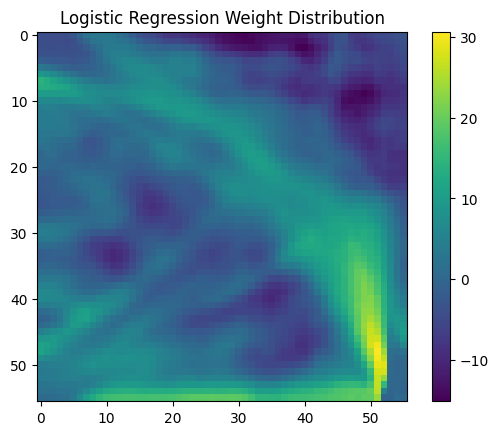

In [7]:
w = clf_lr_scratch.w[1:]
plt.imshow(w.reshape(int(np.sqrt(w.shape[0])), -1))
plt.colorbar()
plt.title('Logistic Regression Weight Distribution')
plt.show()

#### Confusion Matrix

<ipython-input-4-0ae7adf6c1d4>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X*self.w))


(800, 1) (800, 1)


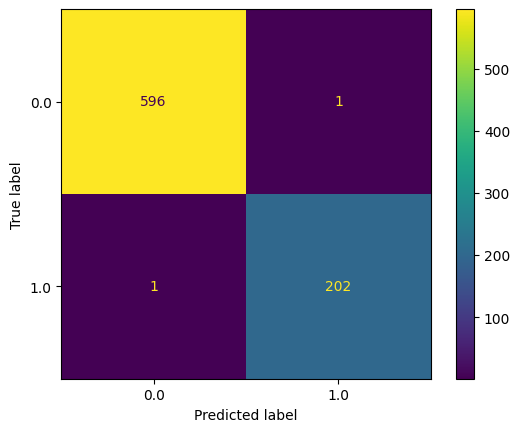

In [8]:
y_pred = np.asarray((clf_lr_scratch.predict(X_test) >= 0.5).astype(int))

print(y_pred.shape,y_test.shape)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Logistic regression algorithm using scikit-learn

In [9]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       203

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



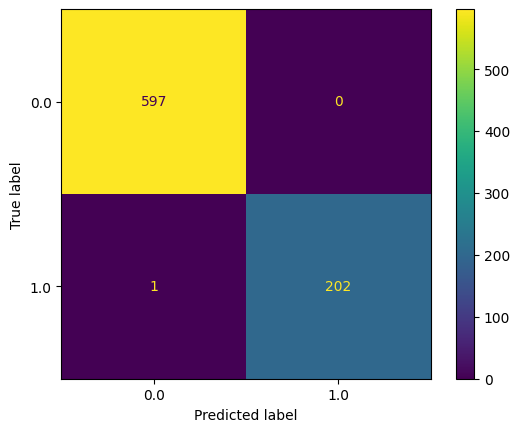

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()